In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from torch.autograd import Variable
from torch.nn import *
from torch.optim import Adam


d:\Users\17020\miniconda3\envs\proto\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 超参数定义(由于我们的隐藏层只有一层，所以可以直接定义为超参数)
batch_size=100
input_feature=100
hidden_feature=1000
output_feature=10
learning_rate=1e-6
epochs=1000
loss_f=MSELoss()


In [3]:
# 参数初始化
x=Variable(torch.randn(batch_size,input_feature),requires_grad=False)
y=Variable(torch.randn(batch_size,output_feature),requires_grad=False)
w1=Variable(torch.randn(input_feature,hidden_feature),requires_grad=True)
w2=Variable(torch.randn(hidden_feature,output_feature),requires_grad=True)

Epoch=[]
Loss=[]
model=Sequential(
    Linear(input_feature,hidden_feature),
    Linear(hidden_feature,output_feature)
)

In [4]:
# optimizer需要传入训练参数和lr
optim=Adam(model.parameters(),lr=learning_rate)
print(model)

Sequential(
  (0): Linear(in_features=100, out_features=1000, bias=True)
  (1): Linear(in_features=1000, out_features=10, bias=True)
)


 19%|█▉        | 191/1000 [00:00<00:01, 486.20it/s]

Epoch:50,loss:1.012779712677002
Epoch:100,loss:1.003319263458252
Epoch:150,loss:0.9939864873886108
Epoch:200,loss:0.98477703332901


 34%|███▍      | 345/1000 [00:00<00:01, 624.93it/s]

Epoch:250,loss:0.9756873250007629
Epoch:300,loss:0.9667142629623413
Epoch:350,loss:0.9578547477722168
Epoch:400,loss:0.9491060376167297


 60%|██████    | 601/1000 [00:01<00:00, 760.46it/s]

Epoch:450,loss:0.9404653310775757
Epoch:500,loss:0.9319303035736084
Epoch:550,loss:0.9234983921051025
Epoch:600,loss:0.9151676297187805


 77%|███████▋  | 768/1000 [00:01<00:00, 715.33it/s]

Epoch:650,loss:0.906935453414917
Epoch:700,loss:0.8988001942634583
Epoch:750,loss:0.8907598853111267


 93%|█████████▎| 932/1000 [00:01<00:00, 762.32it/s]

Epoch:800,loss:0.8828123807907104
Epoch:850,loss:0.874955952167511
Epoch:900,loss:0.8671891689300537
Epoch:950,loss:0.8595098853111267


100%|██████████| 1000/1000 [00:01<00:00, 629.70it/s]


Epoch:1000,loss:0.8519166111946106


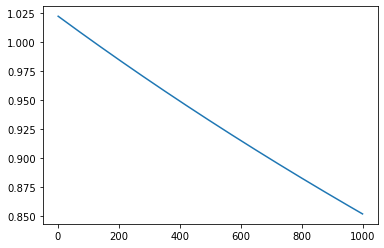

In [5]:
# 迭代训练
for epoch in tqdm.tqdm(range(1,epochs+1)):
    # 前向传播
    y_pred=model(x)
    loss=loss_f(y_pred,y)

    Epoch.append(epoch)
    Loss.append(loss.data)

    if epoch%50==0:
        print("Epoch:{},loss:{}".format(epoch,loss))
    optim.zero_grad()
    # 后向传播
    loss.backward()
    # 参数微调
    optim.step()
    # for parm in model.parameters():
    #     parm.data-=parm.grad.data*learning_rate   

Epoch=np.array(Epoch)
Loss=np.array(Loss)
plt.plot(Epoch,Loss)
plt.show()